# **Crime Analysis**

In [2]:
# Import Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Import Dataset

crimes = pd.read_csv('/content/drive/MyDrive/Crime Analysis/crime_dataset_india.csv')
crimes

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Report Number,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed
0,1,02-01-2020 00:00,01-01-2020 00:00,01-01-2020 01:11,Ahmedabad,576,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No,NaN
1,2,01-01-2020 19:00,01-01-2020 01:00,01-01-2020 06:26,Chennai,128,HOMICIDE,37,M,Poison,Other Crime,9,No,NaN
2,3,02-01-2020 05:00,01-01-2020 02:00,01-01-2020 14:30,Ludhiana,271,KIDNAPPING,48,F,Blunt Object,Other Crime,15,No,NaN
3,4,01-01-2020 05:00,01-01-2020 03:00,01-01-2020 14:46,Pune,170,BURGLARY,49,F,Firearm,Other Crime,1,Yes,29-04-2020 05:00
4,5,01-01-2020 21:00,01-01-2020 04:00,01-01-2020 16:51,Pune,421,VANDALISM,30,F,Other,Other Crime,18,Yes,08-01-2020 21:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40155,40156,01-08-2024 16:00,07-31-2024 03:00,31-07-2024 05:05,Kolkata,312,COUNTERFEITING,78,F,Firearm,Other Crime,12,No,NaN
40156,40157,31-07-2024 14:00,07-31-2024 04:00,31-07-2024 04:14,Mumbai,300,ILLEGAL POSSESSION,75,F,NaN,Other Crime,2,Yes,29-09-2024 14:00
40157,40158,02-08-2024 03:00,07-31-2024 05:00,31-07-2024 21:33,Kanpur,423,VEHICLE - STOLEN,68,M,Other,Violent Crime,6,No,NaN
40158,40159,01-08-2024 19:00,07-31-2024 06:00,31-07-2024 11:05,Patna,311,SEXUAL ASSAULT,11,M,Blunt Object,Violent Crime,1,No,NaN


In [42]:
crimes.head()

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Report Number,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed
0,1,02-01-2020 00:00,01-01-2020 00:00,01-01-2020 01:11,Ahmedabad,576,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No,NaN
1,2,01-01-2020 19:00,01-01-2020 01:00,01-01-2020 06:26,Chennai,128,HOMICIDE,37,M,Poison,Other Crime,9,No,NaN
2,3,02-01-2020 05:00,01-01-2020 02:00,01-01-2020 14:30,Ludhiana,271,KIDNAPPING,48,F,Blunt Object,Other Crime,15,No,NaN
3,4,01-01-2020 05:00,01-01-2020 03:00,01-01-2020 14:46,Pune,170,BURGLARY,49,F,Firearm,Other Crime,1,Yes,29-04-2020 05:00
4,5,01-01-2020 21:00,01-01-2020 04:00,01-01-2020 16:51,Pune,421,VANDALISM,30,F,Other,Other Crime,18,Yes,08-01-2020 21:00


In [43]:
crimes.tail()

,Report Number,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed
40155,40156,01-08-2024 16:00,07-31-2024 03:00,31-07-2024 05:05,Kolkata,312,COUNTERFEITING,78,F,Firearm,Other Crime,12,No,NaN
40156,40157,31-07-2024 14:00,07-31-2024 04:00,31-07-2024 04:14,Mumbai,300,ILLEGAL POSSESSION,75,F,NaN,Other Crime,2,Yes,29-09-2024 14:00
40157,40158,02-08-2024 03:00,07-31-2024 05:00,31-07-2024 21:33,Kanpur,423,VEHICLE - STOLEN,68,M,Other,Violent Crime,6,No,NaN
40158,40159,01-08-2024 19:00,07-31-2024 06:00,31-07-2024 11:05,Patna,311,SEXUAL ASSAULT,11,M,Blunt Object,Violent Crime,1,No,NaN
40159,40160,31-07-2024 17:00,07-31-2024 07:00,31-07-2024 17:19,Delhi,193,DOMESTIC VIOLENCE,43,F,Poison,Violent Crime,7,Yes,28-09-2024 17:00


In [5]:
crimes.shape

(40160, 14)

In [6]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40160 entries, 0 to 40159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Report Number       40160 non-null  int64 
 1   Date Reported       40160 non-null  object
 2   Date of Occurrence  40160 non-null  object
 3   Time of Occurrence  40160 non-null  object
 4   City                40160 non-null  object
 5   Crime Code          40160 non-null  int64 
 6   Crime Description   40160 non-null  object
 7   Victim Age          40160 non-null  int64 
 8   Victim Gender       40160 non-null  object
 9   Weapon Used         34370 non-null  object
 10  Crime Domain        40160 non-null  object
 11  Police Deployed     40160 non-null  int64 
 12  Case Closed         40160 non-null  object
 13  Date Case Closed    20062 non-null  object
dtypes: int64(4), object(10)
memory usage: 4.3+ MB


In [7]:
crimes.describe()

,Report Number,Crime Code,Victim Age,Police Deployed
count,40160.000000,40160.000000,40160.00000,40160.000000
mean,20080.500000,349.360259,44.49126,10.006250
std,11593.337742,144.169205,20.22555,5.467951
min,1.000000,100.000000,10.00000,1.000000
25%,10040.750000,225.000000,27.00000,5.000000
50%,20080.500000,349.000000,44.00000,10.000000
75%,30120.250000,474.000000,62.00000,15.000000
max,40160.000000,599.000000,79.00000,19.000000


In [85]:
crimes.columns

Index(['Report Number', 'Date Reported', 'Date of Occurrence',
       'Time of Occurrence', 'City', 'Crime Code', 'Crime Description',
       'Victim Age', 'Victim Gender', 'Weapon Used', 'Crime Domain',
       'Police Deployed', 'Case Closed', 'Date Case Closed'],
      dtype='object')

In [86]:
data = crimes.copy()
data

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Report Number,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed
0,1,02-01-2020 00:00,01-01-2020 00:00,01-01-2020 01:11,Ahmedabad,576,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No,NaN
1,2,01-01-2020 19:00,01-01-2020 01:00,01-01-2020 06:26,Chennai,128,HOMICIDE,37,M,Poison,Other Crime,9,No,NaN
2,3,02-01-2020 05:00,01-01-2020 02:00,01-01-2020 14:30,Ludhiana,271,KIDNAPPING,48,F,Blunt Object,Other Crime,15,No,NaN
3,4,01-01-2020 05:00,01-01-2020 03:00,01-01-2020 14:46,Pune,170,BURGLARY,49,F,Firearm,Other Crime,1,Yes,29-04-2020 05:00
4,5,01-01-2020 21:00,01-01-2020 04:00,01-01-2020 16:51,Pune,421,VANDALISM,30,F,Other,Other Crime,18,Yes,08-01-2020 21:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40155,40156,01-08-2024 16:00,07-31-2024 03:00,31-07-2024 05:05,Kolkata,312,COUNTERFEITING,78,F,Firearm,Other Crime,12,No,NaN
40156,40157,31-07-2024 14:00,07-31-2024 04:00,31-07-2024 04:14,Mumbai,300,ILLEGAL POSSESSION,75,F,NaN,Other Crime,2,Yes,29-09-2024 14:00
40157,40158,02-08-2024 03:00,07-31-2024 05:00,31-07-2024 21:33,Kanpur,423,VEHICLE - STOLEN,68,M,Other,Violent Crime,6,No,NaN
40158,40159,01-08-2024 19:00,07-31-2024 06:00,31-07-2024 11:05,Patna,311,SEXUAL ASSAULT,11,M,Blunt Object,Violent Crime,1,No,NaN


In [87]:
# Convert 'Date Reported', 'Date of Occurrence' and 'Date Case Closed' to datetiem datatypes

data['Date Reported'] = pd.to_datetime(data['Date Reported'], format='mixed', dayfirst=True)
data['Date of Occurrence'] = pd.to_datetime(data['Date of Occurrence'],format='mixed', dayfirst=True)
data['Date Case Closed'] = pd.to_datetime(data['Date Case Closed'],format='mixed', dayfirst=True)

In [89]:
# Split the date and time

data['Date_Crime_Reported'] = data['Date Reported'].dt.date
data['Time_Crime_Reported'] = data['Date Reported'].dt.time

data['Date_Crime_Occurred'] = data['Date of Occurrence'].dt.date
data['Time_Crime_Occurred'] = data['Date of Occurrence'].dt.time

data['Date_Case_Close'] = data['Date Case Closed'].dt.date
data['Time_Case_Close'] = data['Date Case Closed'].dt.time

In [90]:
data

,Report Number,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed,Date_Crime_Reported,Time_Crime_Reported,Date_Crime_Occurred,Time_Crime_Occurred,Date_Case_Close,Time_Case_Close
0,1,2020-01-02 00:00:00,2020-01-01 00:00:00,01-01-2020 01:11,Ahmedabad,576,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No,NaT,2020-01-02,00:00:00,2020-01-01,00:00:00,NaT,NaT
1,2,2020-01-01 19:00:00,2020-01-01 01:00:00,01-01-2020 06:26,Chennai,128,HOMICIDE,37,M,Poison,Other Crime,9,No,NaT,2020-01-01,19:00:00,2020-01-01,01:00:00,NaT,NaT
2,3,2020-01-02 05:00:00,2020-01-01 02:00:00,01-01-2020 14:30,Ludhiana,271,KIDNAPPING,48,F,Blunt Object,Other Crime,15,No,NaT,2020-01-02,05:00:00,2020-01-01,02:00:00,NaT,NaT
3,4,2020-01-01 05:00:00,2020-01-01 03:00:00,01-01-2020 14:46,Pune,170,BURGLARY,49,F,Firearm,Other Crime,1,Yes,2020-04-29 05:00:00,2020-01-01,05:00:00,2020-01-01,03:00:00,2020-04-29,05:00:00
4,5,2020-01-01 21:00:00,2020-01-01 04:00:00,01-01-2020 16:51,Pune,421,VANDALISM,30,F,Other,Other Crime,18,Yes,2020-01-08 21:00:00,2020-01-01,21:00:00,2020-01-01,04:00:00,2020-01-08,21:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40155,40156,2024-08-01 16:00:00,2024-07-31 03:00:00,31-07-2024 05:05,Kolkata,312,COUNTERFEITING,78,F,Firearm,Other Crime,12,No,NaT,2024-08-01,16:00:00,2024-07-31,03:00:00,NaT,NaT
40156,40157,2024-07-31 14:00:00,2024-07-31 04:00:00,31-07-2024 04:14,Mumbai,300,ILLEGAL POSSESSION,75,F,NaN,Other Crime,2,Yes,2024-09-29 14:00:00,2024-07-31,14:00:00,2024-07-31,04:00:00,2024-09-29,14:00:00
40157,40158,2024-08-02 03:00:00,2024-07-31 05:00:00,31-07-2024 21:33,Kanpur,423,VEHICLE - STOLEN,68,M,Other,Violent Crime,6,No,NaT,2024-08-02,03:00:00,2024-07-31,05:00:00,NaT,NaT
40158,40159,2024-08-01 19:00:00,2024-07-31 06:00:00,31-07-2024 11:05,Patna,311,SEXUAL ASSAULT,11,M,Blunt Object,Violent Crime,1,No,NaT,2024-08-01,19:00:00,2024-07-31,06:00:00,NaT,NaT


In [91]:
# Remove unwanted columns

del data['Date Reported']
del data['Date of Occurrence']
del data['Time of Occurrence']
del data['Date Case Closed']

In [92]:
data

,Report Number,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date_Crime_Reported,Time_Crime_Reported,Date_Crime_Occurred,Time_Crime_Occurred,Date_Case_Close,Time_Case_Close
0,1,Ahmedabad,576,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No,2020-01-02,00:00:00,2020-01-01,00:00:00,NaT,NaT
1,2,Chennai,128,HOMICIDE,37,M,Poison,Other Crime,9,No,2020-01-01,19:00:00,2020-01-01,01:00:00,NaT,NaT
2,3,Ludhiana,271,KIDNAPPING,48,F,Blunt Object,Other Crime,15,No,2020-01-02,05:00:00,2020-01-01,02:00:00,NaT,NaT
3,4,Pune,170,BURGLARY,49,F,Firearm,Other Crime,1,Yes,2020-01-01,05:00:00,2020-01-01,03:00:00,2020-04-29,05:00:00
4,5,Pune,421,VANDALISM,30,F,Other,Other Crime,18,Yes,2020-01-01,21:00:00,2020-01-01,04:00:00,2020-01-08,21:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40155,40156,Kolkata,312,COUNTERFEITING,78,F,Firearm,Other Crime,12,No,2024-08-01,16:00:00,2024-07-31,03:00:00,NaT,NaT
40156,40157,Mumbai,300,ILLEGAL POSSESSION,75,F,NaN,Other Crime,2,Yes,2024-07-31,14:00:00,2024-07-31,04:00:00,2024-09-29,14:00:00
40157,40158,Kanpur,423,VEHICLE - STOLEN,68,M,Other,Violent Crime,6,No,2024-08-02,03:00:00,2024-07-31,05:00:00,NaT,NaT
40158,40159,Patna,311,SEXUAL ASSAULT,11,M,Blunt Object,Violent Crime,1,No,2024-08-01,19:00:00,2024-07-31,06:00:00,NaT,NaT


In [93]:
# Change the order of columns

df = data.loc[:, ['Report Number','Date_Crime_Reported','Time_Crime_Reported','Date_Crime_Occurred','Time_Crime_Occurred','City','Crime Code','Crime Description','Victim Age','Victim Gender','Weapon Used','Crime Domain','Police Deployed','Case Closed','Date_Case_Close','Time_Case_Close']]

In [94]:
df

,Report Number,Date_Crime_Reported,Time_Crime_Reported,Date_Crime_Occurred,Time_Crime_Occurred,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date_Case_Close,Time_Case_Close
0,1,2020-01-02,00:00:00,2020-01-01,00:00:00,Ahmedabad,576,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No,NaT,NaT
1,2,2020-01-01,19:00:00,2020-01-01,01:00:00,Chennai,128,HOMICIDE,37,M,Poison,Other Crime,9,No,NaT,NaT
2,3,2020-01-02,05:00:00,2020-01-01,02:00:00,Ludhiana,271,KIDNAPPING,48,F,Blunt Object,Other Crime,15,No,NaT,NaT
3,4,2020-01-01,05:00:00,2020-01-01,03:00:00,Pune,170,BURGLARY,49,F,Firearm,Other Crime,1,Yes,2020-04-29,05:00:00
4,5,2020-01-01,21:00:00,2020-01-01,04:00:00,Pune,421,VANDALISM,30,F,Other,Other Crime,18,Yes,2020-01-08,21:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40155,40156,2024-08-01,16:00:00,2024-07-31,03:00:00,Kolkata,312,COUNTERFEITING,78,F,Firearm,Other Crime,12,No,NaT,NaT
40156,40157,2024-07-31,14:00:00,2024-07-31,04:00:00,Mumbai,300,ILLEGAL POSSESSION,75,F,NaN,Other Crime,2,Yes,2024-09-29,14:00:00
40157,40158,2024-08-02,03:00:00,2024-07-31,05:00:00,Kanpur,423,VEHICLE - STOLEN,68,M,Other,Violent Crime,6,No,NaT,NaT
40158,40159,2024-08-01,19:00:00,2024-07-31,06:00:00,Patna,311,SEXUAL ASSAULT,11,M,Blunt Object,Violent Crime,1,No,NaT,NaT


In [96]:
# Check for missing values

df.isnull().sum()

,0
Report Number,0
Date_Crime_Reported,0
Time_Crime_Reported,0
Date_Crime_Occurred,0
Time_Crime_Occurred,0
City,0
Crime Code,0
Crime Description,0
Victim Age,0
Victim Gender,0


In [100]:
# Filling Null Values

df['Weapon Used'].fillna('Unknown',inplace = True)
df['Date_Case_Close'].fillna('No',inplace = True)
df['Time_Case_Close'].fillna('No',inplace = True)

<ipython-input-100-95ff945504c8>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Weapon Used'].fillna('Unknown',inplace = True)
<ipython-input-100-95ff945504c8>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [101]:
# Check For Null Values After Filling Process

df.isnull().sum()

,0
Report Number,0
Date_Crime_Reported,0
Time_Crime_Reported,0
Date_Crime_Occurred,0
Time_Crime_Occurred,0
City,0
Crime Code,0
Crime Description,0
Victim Age,0
Victim Gender,0


In [102]:
df

,Report Number,Date_Crime_Reported,Time_Crime_Reported,Date_Crime_Occurred,Time_Crime_Occurred,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date_Case_Close,Time_Case_Close
0,1,2020-01-02,00:00:00,2020-01-01,00:00:00,Ahmedabad,576,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No,No,No
1,2,2020-01-01,19:00:00,2020-01-01,01:00:00,Chennai,128,HOMICIDE,37,M,Poison,Other Crime,9,No,No,No
2,3,2020-01-02,05:00:00,2020-01-01,02:00:00,Ludhiana,271,KIDNAPPING,48,F,Blunt Object,Other Crime,15,No,No,No
3,4,2020-01-01,05:00:00,2020-01-01,03:00:00,Pune,170,BURGLARY,49,F,Firearm,Other Crime,1,Yes,2020-04-29,05:00:00
4,5,2020-01-01,21:00:00,2020-01-01,04:00:00,Pune,421,VANDALISM,30,F,Other,Other Crime,18,Yes,2020-01-08,21:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40155,40156,2024-08-01,16:00:00,2024-07-31,03:00:00,Kolkata,312,COUNTERFEITING,78,F,Firearm,Other Crime,12,No,No,No
40156,40157,2024-07-31,14:00:00,2024-07-31,04:00:00,Mumbai,300,ILLEGAL POSSESSION,75,F,Unknown,Other Crime,2,Yes,2024-09-29,14:00:00
40157,40158,2024-08-02,03:00:00,2024-07-31,05:00:00,Kanpur,423,VEHICLE - STOLEN,68,M,Other,Violent Crime,6,No,No,No
40158,40159,2024-08-01,19:00:00,2024-07-31,06:00:00,Patna,311,SEXUAL ASSAULT,11,M,Blunt Object,Violent Crime,1,No,No,No


In [103]:
# Check for duplicates

df.duplicated().sum()

0

****Exploratory Data Analysis (EDA)****

Let's explore the data to uncover interesting patterns and insights.

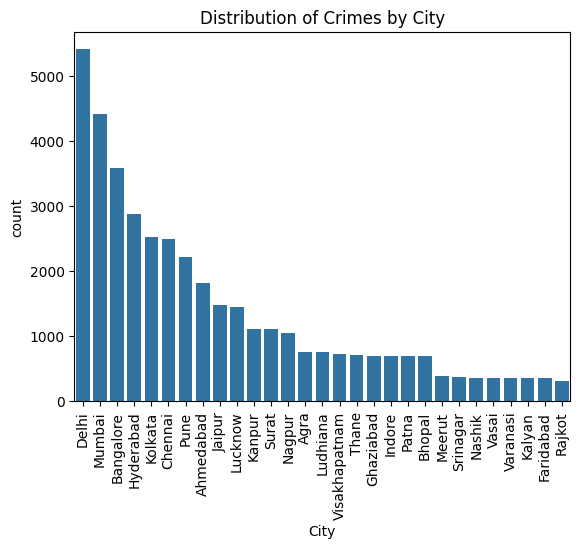

In [111]:
# Crime Count Distribution Across Cities

sns.countplot(data=df, x='City', order=df['City'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribution of Crimes by City')
plt.show()

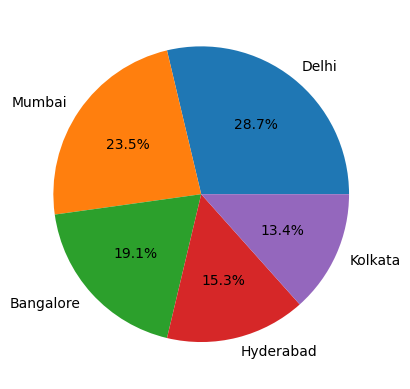

In [115]:
# Top 5 Cities With Highest Crime Rates

city_names = df.City.value_counts().index[:5]
city_val = df.City.value_counts().values[:5]
plt.pie(city_val[:5],labels=city_names, autopct='%1.1f%%')
plt.show()

In [120]:
# Distribution Of Diffrent Crime Types

import plotly.express as px
crime_type_distribution = df['Crime Description'].value_counts().reset_index()
crime_type_distribution.columns = ['Crime Type', 'Count']

fig = px.pie(crime_type_distribution, names='Crime Type', values='Count',
             title='Distribution of Different Crime Types',
             hole=0.4)
fig.show()

In [121]:
# Gender Distribution Of Victims

gender_distribution = df['Victim Gender'].value_counts().reset_index()
gender_distribution.columns = ['Gender', 'Count']

fig = px.pie(gender_distribution, names='Gender', values='Count',
             title='Gender Distribution of Victims',
             hole=0.4)
fig.show()

In [136]:
# Minimum and Maximum Age Victim

df_min = df['Victim Age'].min()
df_max = df['Victim Age'].max()
print(f'Minimum Age Victim: {df_min}')
print(f'Maximum Age Victim: {df_max}')

Minimum Age Victim: 10
Maximum Age Victim: 79


Text(0.5, 1.0, 'Distribution of Cases Closed')

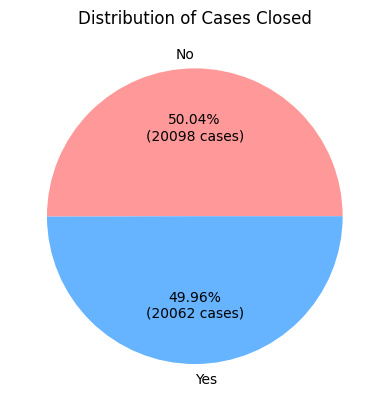

In [132]:
# Distribution of Cases Closed

case_closed_distribution = df['Case Closed'].value_counts()

def format_percentage(pct, allvalues):
    absolute = int(pct/100.*sum(allvalues))
    return f"{pct:.2f}%\n({absolute} cases)"

plt.pie(case_closed_distribution, labels=case_closed_distribution.index, autopct=lambda pct: format_percentage(pct, case_closed_distribution), colors=['#ff9999','#66b3ff'])
plt.title('Distribution of Cases Closed')


<ipython-input-131-2e1de44c563c>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




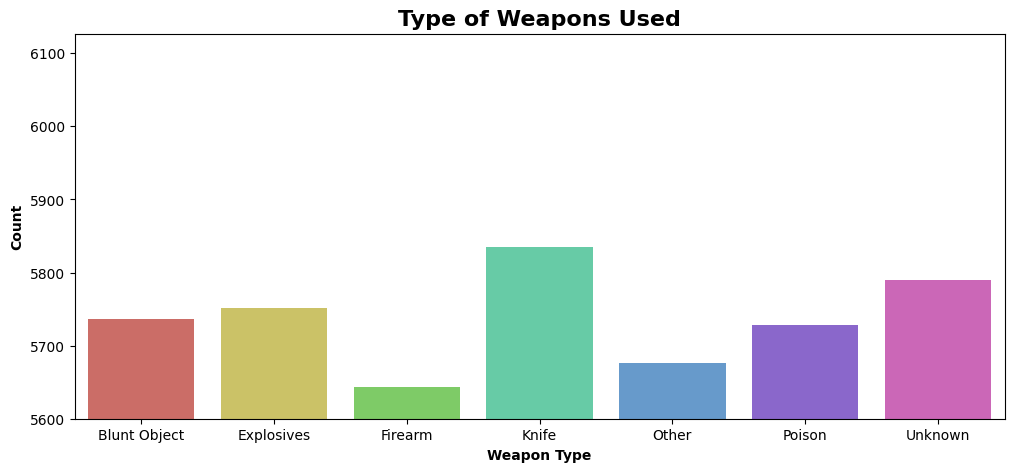

In [131]:
# Count of type of weapons used

type_of_weapons_used = df['Weapon Used'].value_counts().reset_index().sort_values(by='Weapon Used')

plt.figure(figsize=(12,5))
sns.barplot(type_of_weapons_used, x='Weapon Used', y='count', palette='hls').set_ylim(5600)
plt.title("Type of Weapons Used",fontsize=16, fontweight='bold')
plt.xlabel('Weapon Type',fontweight='bold')
plt.ylabel('Count',fontweight='bold')
plt.show()

In [133]:
# Avg age of victims by crime committed

crime_descrip_grp = df.groupby(by='Crime Description')

crime_descrip_grp['Victim Age'].mean().round(0).reset_index()

,Crime Description,Victim Age
0,ARSON,44.0
1,ASSAULT,44.0
2,BURGLARY,44.0
3,COUNTERFEITING,45.0
4,CYBERCRIME,44.0
5,DOMESTIC VIOLENCE,45.0
6,DRUG OFFENSE,44.0
7,EXTORTION,46.0
8,FIREARM OFFENSE,44.0
9,FRAUD,44.0


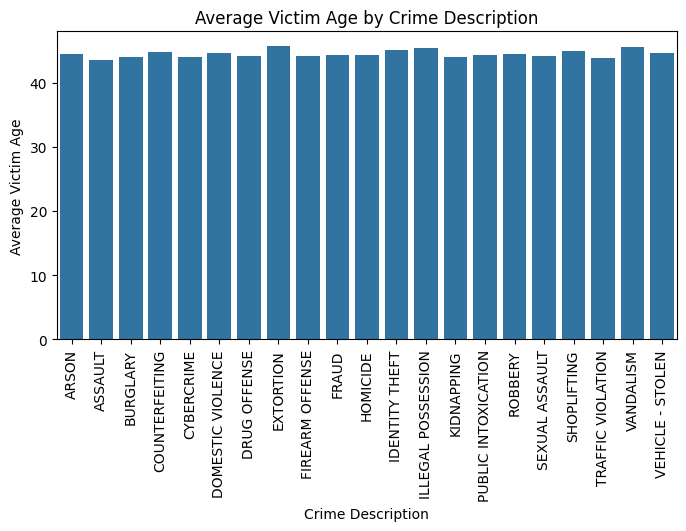

In [155]:
# Average Victim Age by Crime Description

avg_age_by_crime = df.groupby('Crime Description')['Victim Age'].mean().reset_index()

plt.figure(figsize=(8, 4))
sns.barplot(x='Crime Description', y='Victim Age', data=avg_age_by_crime)
plt.xticks(rotation=90)
plt.title('Average Victim Age by Crime Description')
plt.xlabel('Crime Description')
plt.ylabel('Average Victim Age')
plt.show()

In [134]:
# Avg of officers deployed per type of crime

crime_descrip_grp['Police Deployed'].mean().round(2).reset_index()

,Crime Description,Police Deployed
0,ARSON,9.87
1,ASSAULT,10.02
2,BURGLARY,10.09
3,COUNTERFEITING,10.11
4,CYBERCRIME,10.01
5,DOMESTIC VIOLENCE,10.06
6,DRUG OFFENSE,9.84
7,EXTORTION,10.06
8,FIREARM OFFENSE,10.06
9,FRAUD,10.23


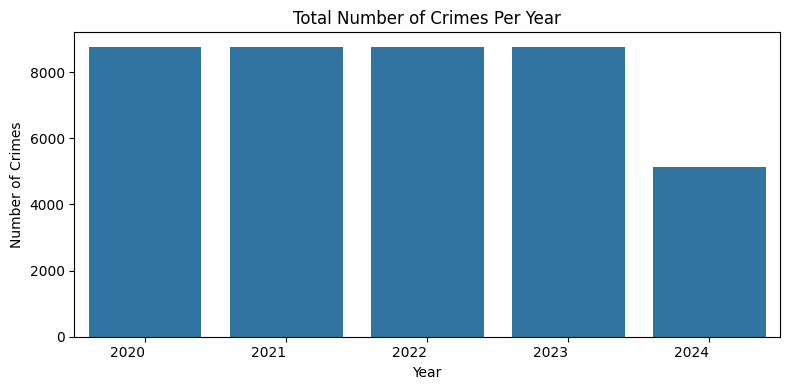

In [142]:
# Total Numbers of Crimes Per Year

df['Year'] = pd.to_datetime(df['Date_Crime_Reported']).dt.year

crime_counts_by_year = df.groupby('Year').size().reset_index(name='Crime_Count')

plt.figure(figsize=(8, 4))
sns.barplot(x='Year', y='Crime_Count', data=crime_counts_by_year)
plt.title('Total Number of Crimes Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.show()

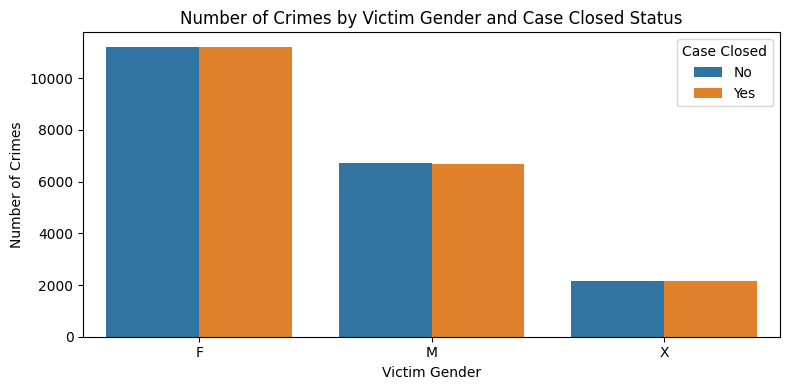

In [160]:
# Number of Crimes by Victim Gender and Case Closed Status

crime_counts = df.groupby(['Victim Gender', 'Case Closed']).size().reset_index(name='Count')

plt.figure(figsize=(8, 4))
sns.barplot(x='Victim Gender', y='Count', hue='Case Closed', data=crime_counts)
plt.title('Number of Crimes by Victim Gender and Case Closed Status')
plt.xlabel('Victim Gender')
plt.ylabel('Number of Crimes')
plt.tight_layout()
plt.show()

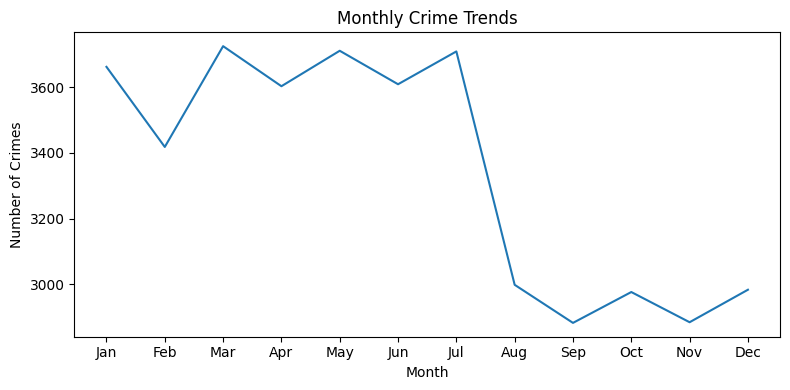

In [163]:
# Monthly Crime Trends

df['Month'] = df['Date_Crime_Reported'].dt.month

crime_counts_by_month = df.groupby('Month').size().reset_index(name='Crime_Count')

plt.figure(figsize=(8,4))
plt.plot(crime_counts_by_month['Month'], crime_counts_by_month['Crime_Count'])
plt.title('Monthly Crime Trends')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()

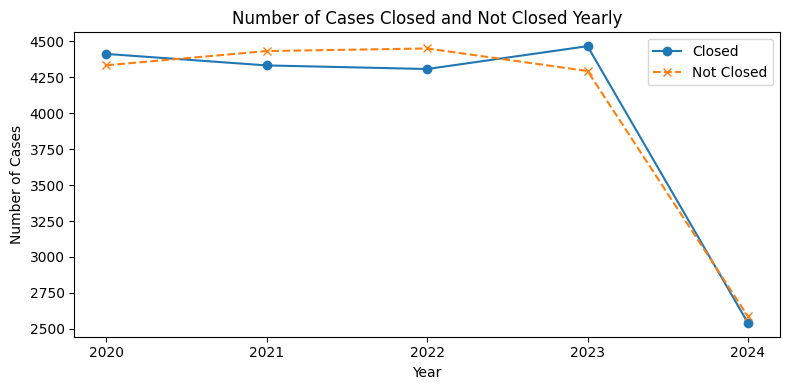

In [171]:
# Number Of Cases Closed and Not Closed Yearly

df['Date_Crime_Reported'] = pd.to_datetime(df['Date_Crime_Reported'])

df['Year'] = df['Date_Crime_Reported'].dt.year

case_counts = df.groupby(['Year', 'Case Closed']).size().reset_index(name='Count')

case_counts_pivot = case_counts.pivot(index='Year', columns='Case Closed', values='Count').fillna(0)

plt.figure(figsize=(8,4))
plt.plot(case_counts_pivot.index, case_counts_pivot['Yes'], label='Closed', marker='o', linestyle='-')
plt.plot(case_counts_pivot.index, case_counts_pivot['No'], label='Not Closed', marker='x', linestyle='--')
plt.title('Number of Cases Closed and Not Closed Yearly')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.xticks(case_counts_pivot.index)
plt.legend()
plt.tight_layout()
plt.show()